In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans, BisectingKMeans
from matplotlib import pyplot as plt
df=pd.read_excel("Complete-dataset-FINAL.xlsx")

# Over dit document
In dit document worden meerdere clustertechnieken uitgewerkt om te kijken naar de verdeling van clusters. Dit is naar aanleiding van een inconsistente clusterverdeling bij de parameters 'Reference value' en 'Year'. 

Auteur: Eefkje-Femke Jansen van der Sligte

# Data preparation 

In [2]:
df = df.drop(columns=['N (no. labs)', 'Source (CAP/EurA1c)', 'Type (Fresh/frozen)', 'Manufacturer', 'Sample', 'Method name']) # kolomm weggooien
df.columns 

Index(['Mean', 'Bias', 'CV', 'Reference Value', 'Year', 'Total Error'], dtype='object')

In [3]:
df["Bias"] = df["Bias"].replace("-", np.nan)
df["Bias"] = pd.to_numeric(df["Bias"])

df["Mean"] = df["Mean"].replace("-", np.nan)
df["Mean"] = pd.to_numeric(df["Mean"])

df["CV"] = df["CV"].replace("-", np.nan)
df["CV"] = df["CV"].replace(" ", np.nan)
df["CV"] = pd.to_numeric(df["CV"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mean             4602 non-null   float64
 1   Bias             4058 non-null   float64
 2   CV               4584 non-null   float64
 3   Reference Value  4656 non-null   float64
 4   Year             4684 non-null   float64
 5   Total Error      4688 non-null   float64
dtypes: float64(6)
memory usage: 219.9 KB


In [4]:
df = df.dropna()

# Modeling
### Techniek 1

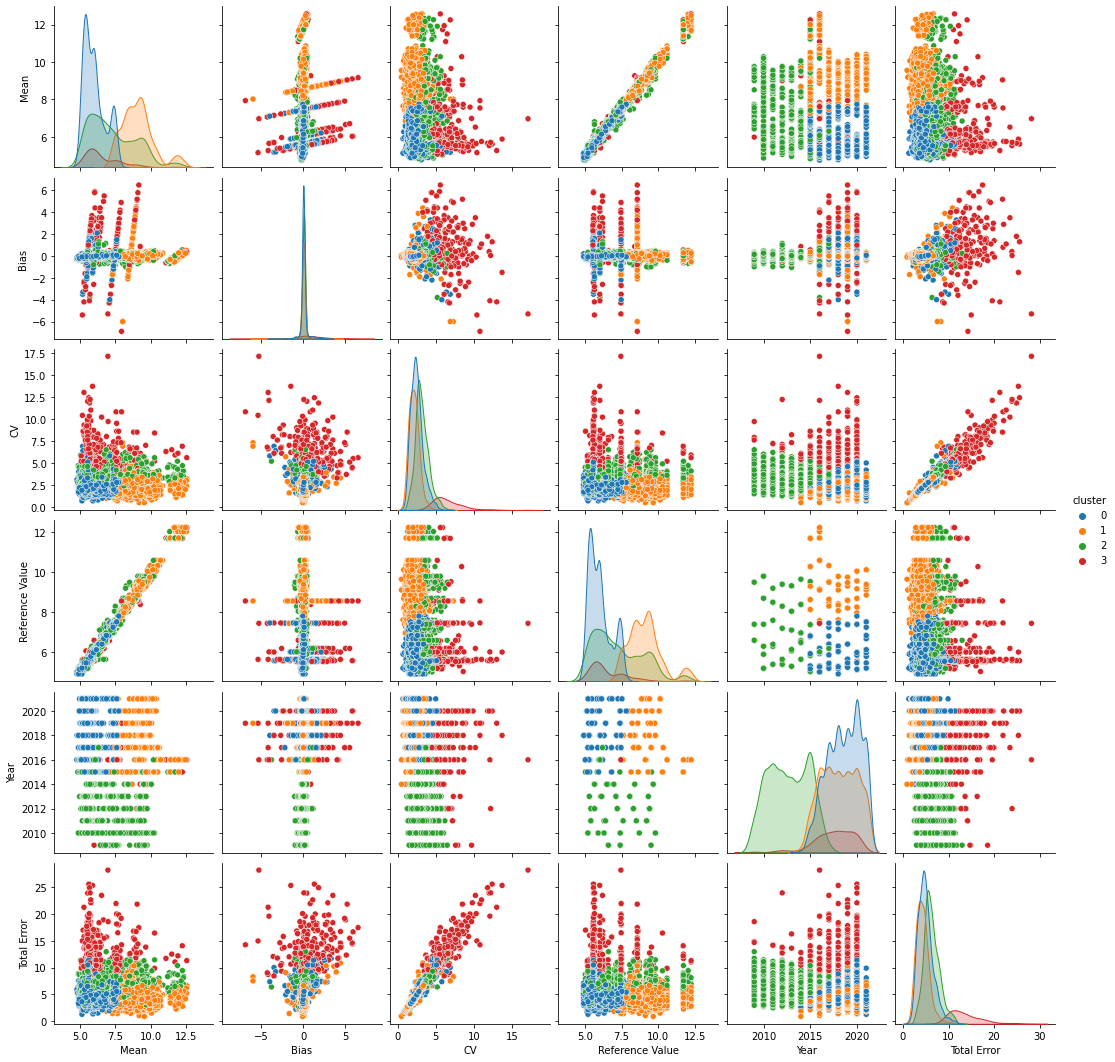

In [5]:
df_model = df.copy()
bisect_means = BisectingKMeans(n_clusters=4, random_state=0).fit(df_model)
df_model['cluster'] = bisect_means.labels_

df_model['cluster'] = df_model['cluster'].astype('category')
sns.pairplot(df_model, hue='cluster')

### Techniek 2

In [6]:
from scipy.cluster.vq import kmeans, vq, kmeans2

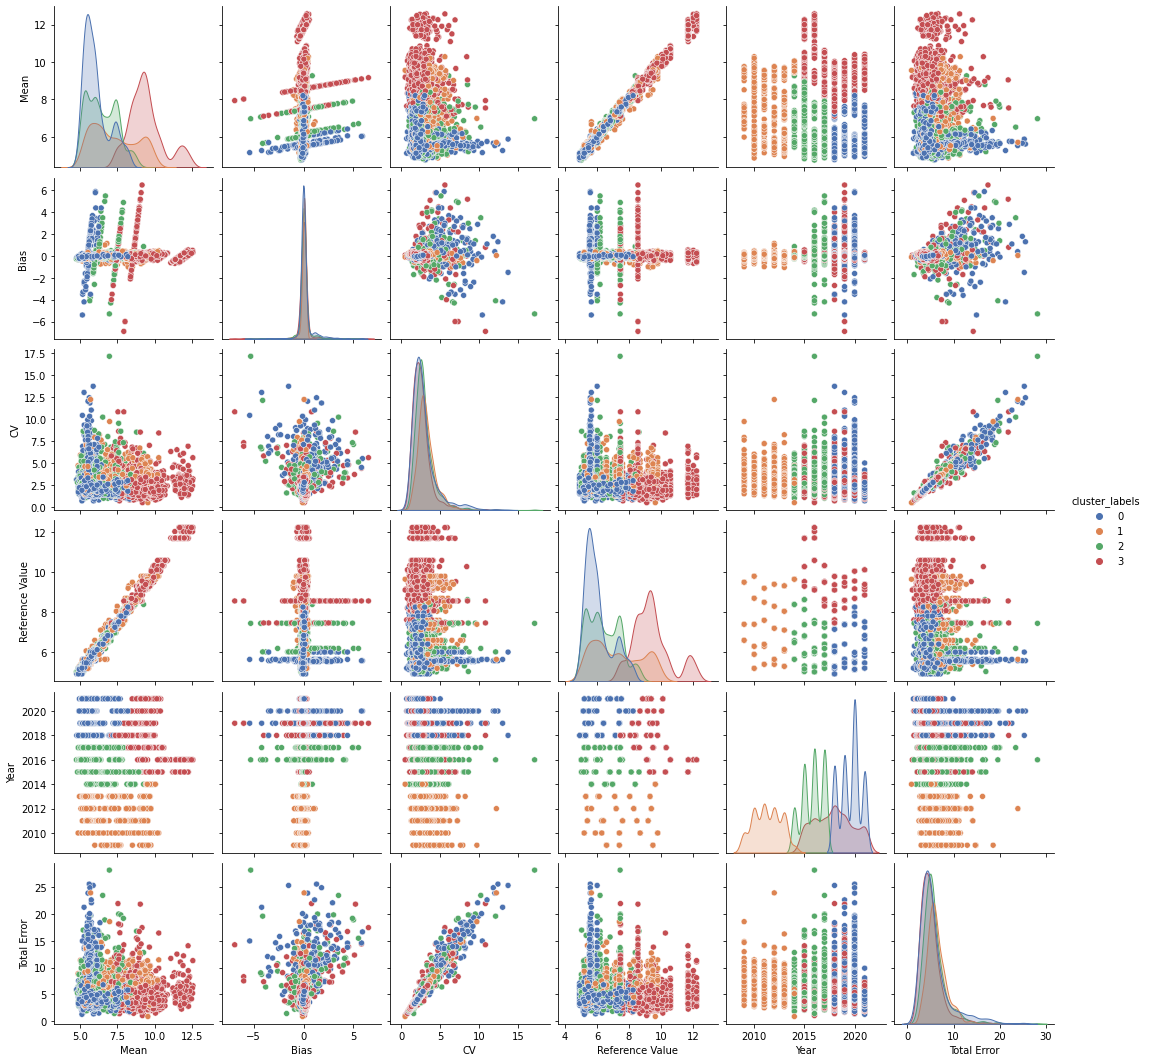

In [7]:
# Generate cluster centers and labels
cluster_centers, _ = kmeans(df[['Reference Value', 'Year']], 4)
df['cluster_labels'], _ = vq(df[['Reference Value', 'Year']], cluster_centers)
# VQ function assists the kmeans algorithm by finding the new centroids.

#Show clusters
sns.pairplot(df, hue='cluster_labels', palette='deep')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Reference Value'>

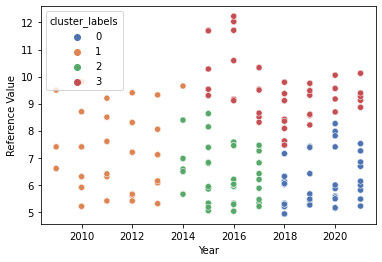

In [8]:
sns.scatterplot(x='Year', y='Reference Value', hue='cluster_labels', data=df, palette='deep')


# Techniek 3
Note:

Het verschil tussen kmeans en kmeans2 zijn de uitgangspunten wanneer het clusteren van data stopt. De kmeans zal het clusteren stoppen op basis van gebrek aan verandering (op basis van de meest lage transformatie uitkomst) en de kmeans2 zal naar de meest optimale clusterindeling zoeken.

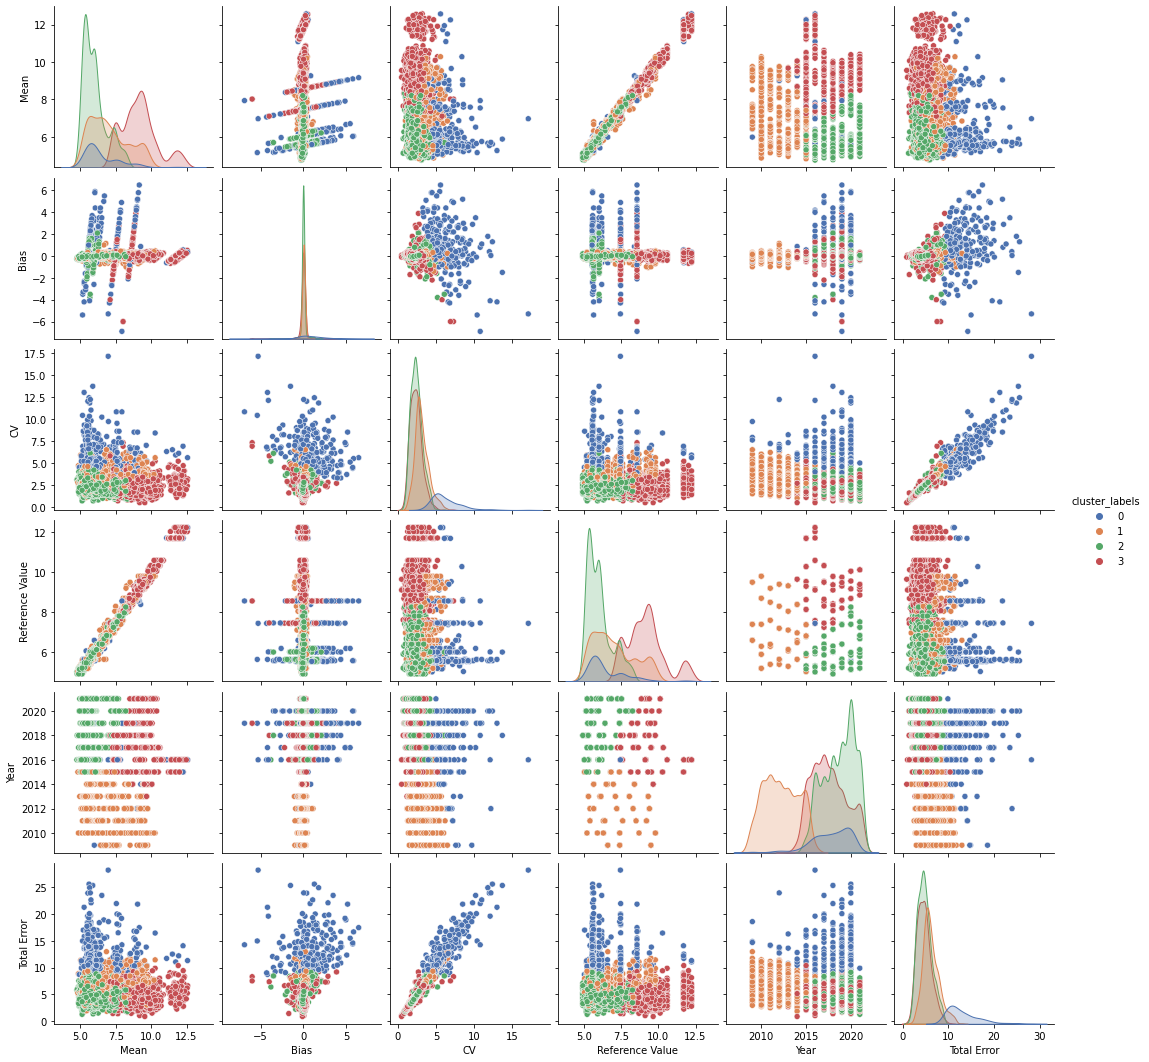

In [9]:
# Generate cluster centers and labels
cluster_centers, _ = kmeans2(df, 4,minit='points')
df['cluster_labels'], _ = vq(df, cluster_centers)
# Plot clusters
df['cluster'] = df['cluster_labels'].astype('category')
sns.pairplot(df, hue='cluster_labels', palette='deep')

# Evaluation

Bij de technieken die hier boven zijn uitgewerkt, zijn voornamelijk dezelfde clusterindelingen terug te zien. Bij het specifiek clusteren van de 'Reference value' en de 'year' is een andere clusterindeling ontstaan. Hier is te zien dat de methode die gebruikt wordt bij het clusteren en de parameters waarop geclusterd wordt, het resultaat beïnvloeden. Verder zijn er geen andere grote verschillen in andere variabelen geconstateerd tussen de 3 uitgewerkte clusteranalyses en de voorgaande clusteranalyse. 


## Conclusie
De verschillende technieken en indeling van clusters laten zien dat de clustering van de dataset over het algemeen hetzelfde resultaat oplevert. Indien externe parameters zijn weggehaald of toegevoegd (zoals bij techniek 2) zal de clusterindeling hierin veranderen. 


## Advies
Het advies is om de technieken mee te nemen bij het uitvoeren van de clusteranalyse. Door meer parameters (randomstate) te gebruiken, is de clusteranalyse beter na te bootsen. 



Note: de voorgaande cluster analyse is uitgevoerd, voordat er besloten was om de data te scheiden op basis van rapportages (Amerikaans/Europees). Daarom is de data niet gescheiden.